1. Definición del Sistema
Para hacerlo sencillo, supongamos que tenemos un motor cuya entrada es un voltaje
𝑢
(
𝑡
)
u(t) y su salida es la posición angular
𝜃
(
𝑡
)
θ(t). Supongamos que el modelo dinámico del motor se puede aproximar por la ecuación diferencial de primer orden:

𝜏
𝑑
𝜃
𝑑
𝑡
+
𝜃
=
𝐾
𝑢
τ
dt
dθ
​
 +θ=Ku

donde:

𝜏
τ es la constante de tiempo del motor.
𝐾
K es la ganancia del motor.
𝑢
(
𝑡
)
u(t) es la entrada (voltaje aplicado).
𝜃
(
𝑡
)
θ(t) es la salida (posición angular).
2. Discretización del Modelo
Para la simulación, necesitamos discretizar este modelo. Usando un método simple como Euler hacia adelante, podemos aproximar la derivada como:

𝑑
𝜃
𝑑
𝑡
≈
𝜃
(
𝑡
+
1
)
−
𝜃
(
𝑡
)
Δ
𝑡
dt
dθ
​
 ≈
Δt
θ(t+1)−θ(t)
​


Sustituyendo en la ecuación original y despejando para
𝜃
(
𝑡
+
1
)
θ(t+1):

𝜃
(
𝑡
+
1
)
=
𝜃
(
𝑡
)
+
Δ
𝑡
(
𝐾
𝑢
(
𝑡
)
−
𝜃
(
𝑡
)
𝜏
)
θ(t+1)=θ(t)+Δt(
τ
Ku(t)−θ(t)
​
 )

3. Implementación en Python

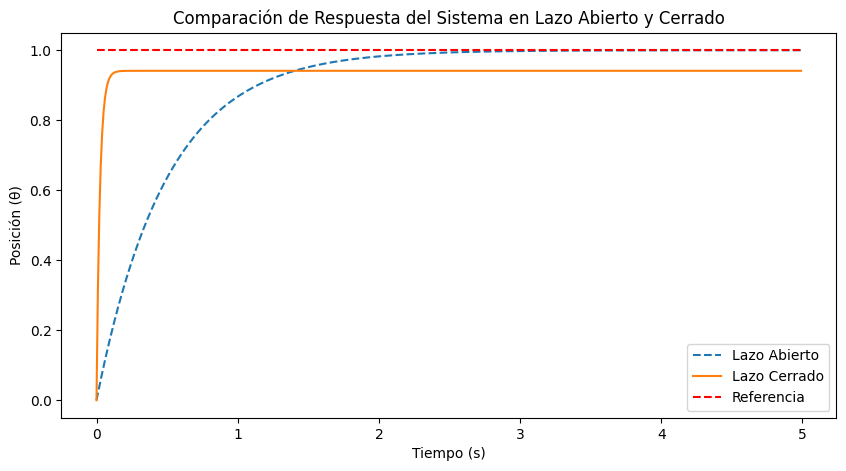

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
K = 2.0  # ganancia
tau = 0.5  # constante de tiempo
dt = 0.01  # paso temporal
time = np.arange(0, 5, dt)  # tiempo total de simulación

# Condiciones iniciales
theta_open = np.zeros(len(time))  # salida en lazo abierto
theta_closed = np.zeros(len(time))  # salida en lazo cerrado
theta_ref = 1.0  # posición deseada (referencia)

# Simulación en lazo abierto
u_open = 0.5  # entrada constante
for i in range(1, len(time)):
    theta_open[i] = theta_open[i-1] + dt * ((K * u_open - theta_open[i-1]) / tau)

# Simulación en lazo cerrado
kp = 8.0  # ganancia proporcional
for i in range(1, len(time)):
    error = theta_ref - theta_closed[i-1]
    u_closed = kp * error  # ley de control proporcional
    theta_closed[i] = theta_closed[i-1] + dt * ((K * u_closed - theta_closed[i-1]) / tau)

# Graficación de los resultados
plt.figure(figsize=(10, 5))
plt.plot(time, theta_open, label='Lazo Abierto', linestyle='--')
plt.plot(time, theta_closed, label='Lazo Cerrado')
plt.plot(time, np.ones_like(time) * theta_ref, 'r--', label='Referencia')
plt.title('Comparación de Respuesta del Sistema en Lazo Abierto y Cerrado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (θ)')
plt.legend()
plt.show()


4. Explicación del Código y Resultados
En este código:

Se inicializan los vectores de tiempo y de posición para ambos casos (lazo abierto y cerrado).
Se simula el sistema en lazo abierto aplicando una entrada constante.
En lazo cerrado, se implementa una ley de control proporcional (P) donde la entrada depende del error entre la posición deseada y la posición actual.
Finalmente, se grafican los resultados para comparar.
Los resultados muestran cómo el sistema en lazo cerrado puede seguir la referencia deseada mientras que el sistema en lazo abierto no lo hace, mostrando la importancia del control feedback para ciertas aplicaciones.